In [56]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [57]:
img = cv2.imread('/content/drive/MyDrive/ĐẠI HỌC KHÔNG HỌC ĐẠI/Thi Giac May Tinh/KNN - BÀI TOÁN PHÂN LỚP ẢNH/Train/Images/321.jpg')
#chuyển đổi không gian màu của ảnh từ BGR (Blue-Green-Red) sang RGB (Red-Green-Blue)
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

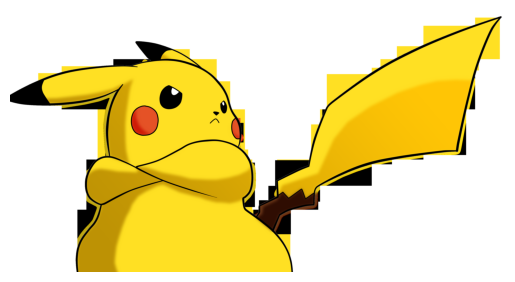

In [58]:
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

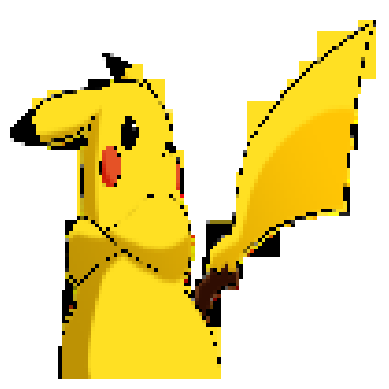

In [59]:
crop = cv2.resize(rgb_image,(100,100))
plt.imshow(crop)
plt.axis('off')
plt.show()

# KNN algorithm

In [60]:
#khoảng cách giữa hai vector a1 và a2 Euclidean
def dist(a1,a2):
    return np.sum((a1-a2)**2)**.5

In [61]:
def KNN(X,Y,test_point,k=5):
    tt =cv2.imread("/content/drive/MyDrive/ĐẠI HỌC KHÔNG HỌC ĐẠI/Thi Giac May Tinh/KNN - BÀI TOÁN PHÂN LỚP ẢNH/Train/Images/" + X[0])
    # ảnh mẫu tt cùng kích thước test_point
    t2 = cv2.resize(tt,(100,100))
    m=t2.shape[0]

#lưu trữ khoảng cách và nhãn tương ứng
    vals = []


    for i in range(300):
        con = cv2.imread("/content/drive/MyDrive/ĐẠI HỌC KHÔNG HỌC ĐẠI/Thi Giac May Tinh/KNN - BÀI TOÁN PHÂN LỚP ẢNH/Train/Images/" + X[i])
        con1 = cv2.cvtColor(con, cv2.COLOR_BGR2RGB)
        con2 = cv2.resize(con1,(100,100))
        d = dist(con2,test_point)
        vals.append((d,Y[i]))

# Chỉ lấy k phần tử đầu tiên trong danh sách vals (kết quả gần nhất) để thực hiện bước tiếp theo của thuật toán KNN.
    vals = sorted(vals)
    vals = vals[:k]

    return vals

    #vals = np.array(vals[:k])
    #b= np.unique(vals[:,1],return_counts=True)
    #idx = np.argmax(b[i])
    #pred = b[0][idx]

    #return str(pred)

#Main Code


In [62]:
df = pd.read_csv('/content/drive/MyDrive/ĐẠI HỌC KHÔNG HỌC ĐẠI/Thi Giac May Tinh/KNN - BÀI TOÁN PHÂN LỚP ẢNH/Train/train.csv')

In [63]:
df.head()


,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu


In [64]:
df.shape


(304, 2)

In [65]:
data = df.values


In [66]:
Y = data[:,1]
X = data[:,0]

In [67]:
df1 = pd.read_csv('/content/drive/MyDrive/ĐẠI HỌC KHÔNG HỌC ĐẠI/Thi Giac May Tinh/KNN - BÀI TOÁN PHÂN LỚP ẢNH/Test/test.csv')
df1.shape

(123, 1)

In [68]:
df1.head()

,ImageId
0,1106.jpg
1,2236.jpg
2,1131.jpg
3,2221.jpg
4,2011.jpg


In [69]:
data = df1.values
Z = data[:,0]

In [70]:
Z.shape

(123,)

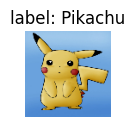

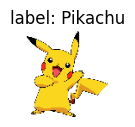

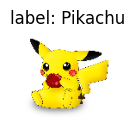

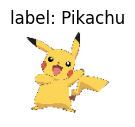

In [71]:
plt.figure()
i=0
for i in range(4):
    s1 = cv2.imread('/content/drive/MyDrive/ĐẠI HỌC KHÔNG HỌC ĐẠI/Thi Giac May Tinh/KNN - BÀI TOÁN PHÂN LỚP ẢNH/Train/Images/' + X[i])
    s2 = cv2.cvtColor(s1, cv2.COLOR_BGR2RGB)
    c1 = cv2.resize(s2,(100,100))
    plt.subplot(2,5,i+1)
    plt.imshow(c1)
    plt.title("label: " + str(Y[i]))
    plt.axis('off')
    plt.show()

#check xem ảnh đã được resize các thứ các kiểu chuẩn chưa


In [72]:
# Tạo DataFrame rỗng với cột "PokemonName"
df2 = pd.DataFrame(columns=["PokemonName"])

# Thêm 41 dòng "Bulbasaur"
for _ in range(41):
    df2 = df2.append({"PokemonName": "Bulbasaur"}, ignore_index=True)

# Thêm 41 dòng "Pikachu"
for _ in range(41):
    df2 = df2.append({"PokemonName": "Pikachu"}, ignore_index=True)

# Thêm 41 dòng "Charmander"
for _ in range(41):
    df2 = df2.append({"PokemonName": "Charmander"}, ignore_index=True)

# In ra DataFrame
df2.head(5)

<ipython-input-72-862d5c917f35>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"PokemonName": "Bulbasaur"}, ignore_index=True)
<ipython-input-72-862d5c917f35>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"PokemonName": "Bulbasaur"}, ignore_index=True)
<ipython-input-72-862d5c917f35>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"PokemonName": "Bulbasaur"}, ignore_index=True)
<ipython-input-72-862d5c917f35>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"PokemonName": "Bulbasaur"}, ignore_index=True)
<ipython-input-72-862d5c917f35>:6: FutureWarning: The fr

,PokemonName
0,Bulbasaur
1,Bulbasaur
2,Bulbasaur
3,Bulbasaur
4,Bulbasaur


In [73]:
dft = df1['ImageId'].sort_values().reset_index(drop=True)
df3 = pd.concat([dft, df2], axis=1)
df3.head(50)

,ImageId,PokemonName
0,1100.jpg,Bulbasaur
1,1101.jpg,Bulbasaur
2,1102.jpg,Bulbasaur
3,1103.jpg,Bulbasaur
4,1104.jpg,Bulbasaur
5,1105.jpg,Bulbasaur
6,1106.jpg,Bulbasaur
7,1107.jpg,Bulbasaur
8,1108.jpg,Bulbasaur
9,1109.jpg,Bulbasaur


Image 1100.jpg: Predicted label: Pikachu, Actual label: Bulbasaur, Confidence: 0.6, Correct: False


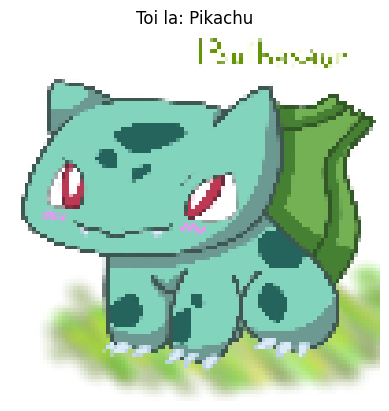

Image 1101.jpg: Predicted label: Charmander, Actual label: Bulbasaur, Confidence: 0.6, Correct: False


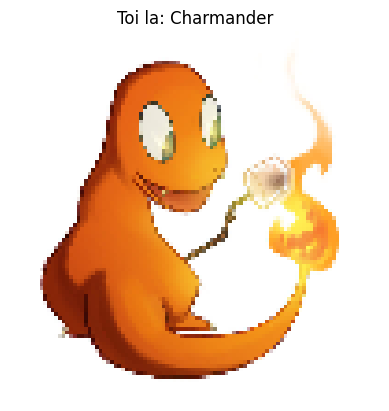

Image 1102.jpg: Predicted label: Bulbasaur, Actual label: Bulbasaur, Confidence: 1.0, Correct: True


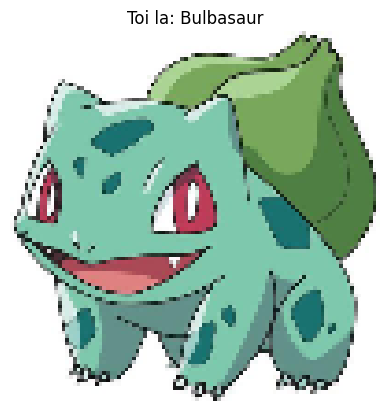

Image 1103.jpg: Predicted label: Pikachu, Actual label: Bulbasaur, Confidence: 0.7, Correct: False


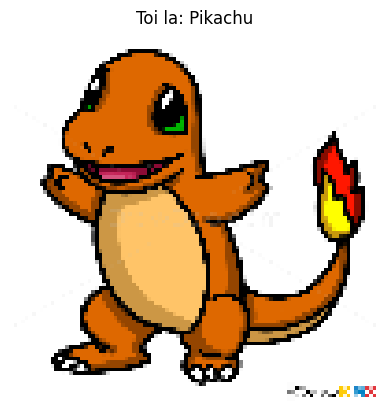

Image 1104.jpg: Predicted label: Pikachu, Actual label: Bulbasaur, Confidence: 0.7, Correct: False


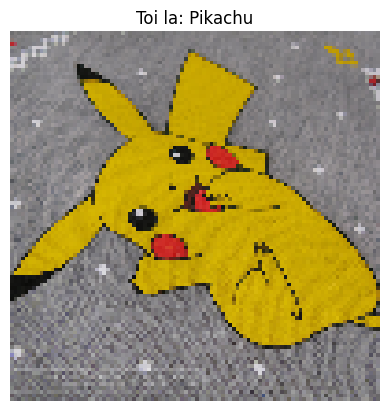

Độ tin cậy: 0.2


In [74]:
num_images = 5  # Số lượng ảnh muốn xử lý
correct_predictions = 0  # Số lượng ảnh đoán đúng
total_images = 0  # Tổng số lượng ảnh đã xử lý
plt.figure()
for i in range(num_images):
    image_id = df3.iloc[i]['ImageId']
    pokemon_name = df3.iloc[i]['PokemonName']

    s1 = cv2.imread('/content/drive/MyDrive/ĐẠI HỌC KHÔNG HỌC ĐẠI/Thi Giac May Tinh/KNN - BÀI TOÁN PHÂN LỚP ẢNH/Test/Images/' + Z[i])
    s2 = cv2.cvtColor(s1, cv2.COLOR_BGR2RGB)
    c1 = cv2.resize(s2, (100, 100))
    pred = KNN(X, Y, c1, 10)

    # Đếm số lượng nhãn trong kết quả phân loại
     # Đếm số lượng nhãn trong kết quả phân loại
    label_counts = {}
    for _, label in pred:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

    # Xác định kết quả phân loại chính xác
    predicted_label = max(label_counts, key=label_counts.get)
    is_correct = predicted_label == pokemon_name

    if is_correct:
        correct_predictions += 1

    total_images += 1

    confidence = label_counts[predicted_label] / sum(label_counts.values())

    print(f"Image {image_id}: Predicted label: {predicted_label}, Actual label: {pokemon_name}, Confidence: {confidence}, Correct: {is_correct}")
     #plt.subplot(2,5,i+1)
    plt.imshow(c1)
    plt.title("Toi la: " + str(predicted_label))
    #plt.title("label: " + str(Y[i]))
    plt.axis('off')
    plt.show()

# Tính độ tin cậy dựa vào số lượng ảnh đoán đúng
accuracy = correct_predictions / total_images

# In ra độ tin cậy
print("Độ tin cậy:", accuracy)